In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics as mts
from sklearn.cross_validation import train_test_split as tts

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sns.set(style="whitegrid", palette="Set3", font="sans-serif", font_scale=1.5)

In [3]:
# read dataset into pandas dataframe with name "initData"
initData = pd.read_csv('data/diabetic_data.csv')

In [4]:
# display all columns in dataset
initData.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# explore first 5 rows of dataset
initData.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital    ...     citoglipton insulin  glyburide-metformin  \
0                 1    ...              No      No                   No   
1                 3    ...              No      Up                   No   
2                 2    ...              No      No                   No   
3                 2    ...              No      Up                   No   
4                 1    ...              No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

# Handling Missing Values

In [6]:
# checking for any null values in any of the columns
initData.isnull().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
weight                      False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [7]:
# brief overview of the dataset
initData.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [9]:
# get unique values in the race column
initData.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'], dtype=object)

In [10]:
# get count of values in weight column where value = ?
initData.weight[initData.weight == '?'].count()

98569

In [11]:
# get unique values in the payer_code column
initData.payer_code.unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [12]:
# get count of values in payer column where value = ?
initData.payer_code[initData.payer_code == '?'].count()

40256

In [13]:
# get unique values in the medical_specialty column
initData.medical_specialty.unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology', 'Surgery-Plastic',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Ophthalmology', 'Surgery-Pediatric',
       'Pediatrics-EmergencyMedicine', 'PhysicalMedicineandRehabilit

In [14]:
# get count of values in medical_specialty column where value = ?
initData.medical_specialty[initData.medical_specialty == '?'].count()

49949

In [15]:
# get unique values in the diag_2 column
initData.diag_2.unique()

array(['?', '250.01', '250', '250.43', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '456', '401', '715',
       '496', '428', '585', '250.02', '410', '999', '996', '135', '244',
       '41', '571', '276', '997', '599', '424', '491', '553', '707', '286',
       '440', '493', '242', '70', 'V45', '250.03', '357', '511', '196',
       '396', '197', '414', '250.52', '577', '535', '413', '285', '53',
       '780', '518', '150', '566', '250.6', '867', '486', 'V15', '8',
       '788', '340', '574', '581', '228', '530', '250.82', '786', '294',
       '567', '785', '512', '305', '729', '250.51', '280', '648', '560',
       '618', '444', '38', 'V10', '578', '277', '781', '250.42', '278',
       '426', '584', '462', '402', '153', '272', '733', '34', '881', '203',
       '250.41', '250.13', '293', '245', '250.12', '558', '787', '342',
       '573', '626', '303', '250.53', '458', '710', '415', 'V42', '284',
       '569', '759', '682', '112', '292', '435', '290'

In [16]:
# get count of values in diag_2 column where value = ?
initData.diag_2[initData.diag_2 == '?'].count()

358

In [17]:
# get unique values in the diag_3 column
initData.diag_3.unique()

array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '599', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '250.7', '250.52', '784',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '196',
       '461', '535', '787', '891', '284', '458', '648', '780', '182',
       '285', '593', '413', '664', '564', '201', '356', 'V15', '2

In [18]:
# get count of values in diag_3 column where value = ?
initData.diag_3[initData.diag_3 == '?'].count()

1423

In [19]:
# get unique values in the num_medications column
initData.num_medications.unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74], dtype=int64)

In [20]:
# get count of values in diag_3 column where value = ?
initData.diag_3[initData.diag_3 == '?'].count()

1423

In [21]:
initData.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'], dtype=object)

In [22]:
initData = initData[~(initData['race'] == '?')]

In [123]:
initData.gender.unique() # get unique values in the gender column

array([0, 1], dtype=int64)

In [23]:
initData.gender[(initData['gender'] == 'Unknown/Invalid')].count()

1

In [25]:
# remove all rows whos gender is unknown/invalid
initData = initData[~(initData['gender'] == 'Unknown/Invalid')]

In [26]:
len(initData)

99492

# Data Transformation

In [27]:
# remove all rows whos admission type is either 'not available' or 'null'
initData = initData[~(initData['admission_type_id'] == 5) & ~(initData['admission_type_id'] == 6)]

In [28]:
len(initData)

89540

In [30]:
initData.admission_source_id.unique()

array([ 7,  2,  4,  1,  6, 20,  5,  8, 17,  3,  9, 14, 10, 22, 11, 25, 13], dtype=int64)

In [31]:
# remove all rows whos admission source is either unknown, not available, or not mapped
initData = initData[
    ~(initData['admission_source_id'] == 9) & 
    ~(initData['admission_source_id'] == 15) & 
    ~(initData['admission_source_id'] == 17) &
    ~(initData['admission_source_id'] == 20) &
    ~(initData['admission_source_id'] == 21)
]

In [32]:
len(initData)

88462

In [33]:
initData.age.unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [126]:
ageDistribution.figure.savefig('graph/a.png')


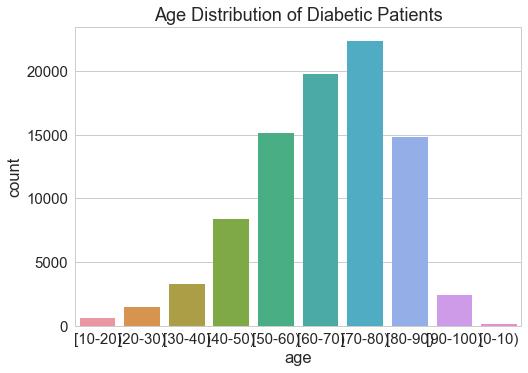

In [34]:
ageDistribution = sns.countplot(x="age", data=initData).set_title('Age Distribution of Diabetic Patients')

In [128]:
ageDistribution.figure.savefig('graphs_findings/patient_age_distribution.png') # save generated graph

In [35]:
# # Only keep rows where age is 10 or above
initData = initData[~(initData['age'] == '[0-10)')]

In [36]:
len(initData)

88316

In [37]:
initData.gender[initData.gender == 'Male'].count()

40623

In [38]:
initData.gender[initData.gender == 'Female'].count()

47693

In [39]:
ms_data = initData.groupby('medical_specialty')['medical_specialty'].count()

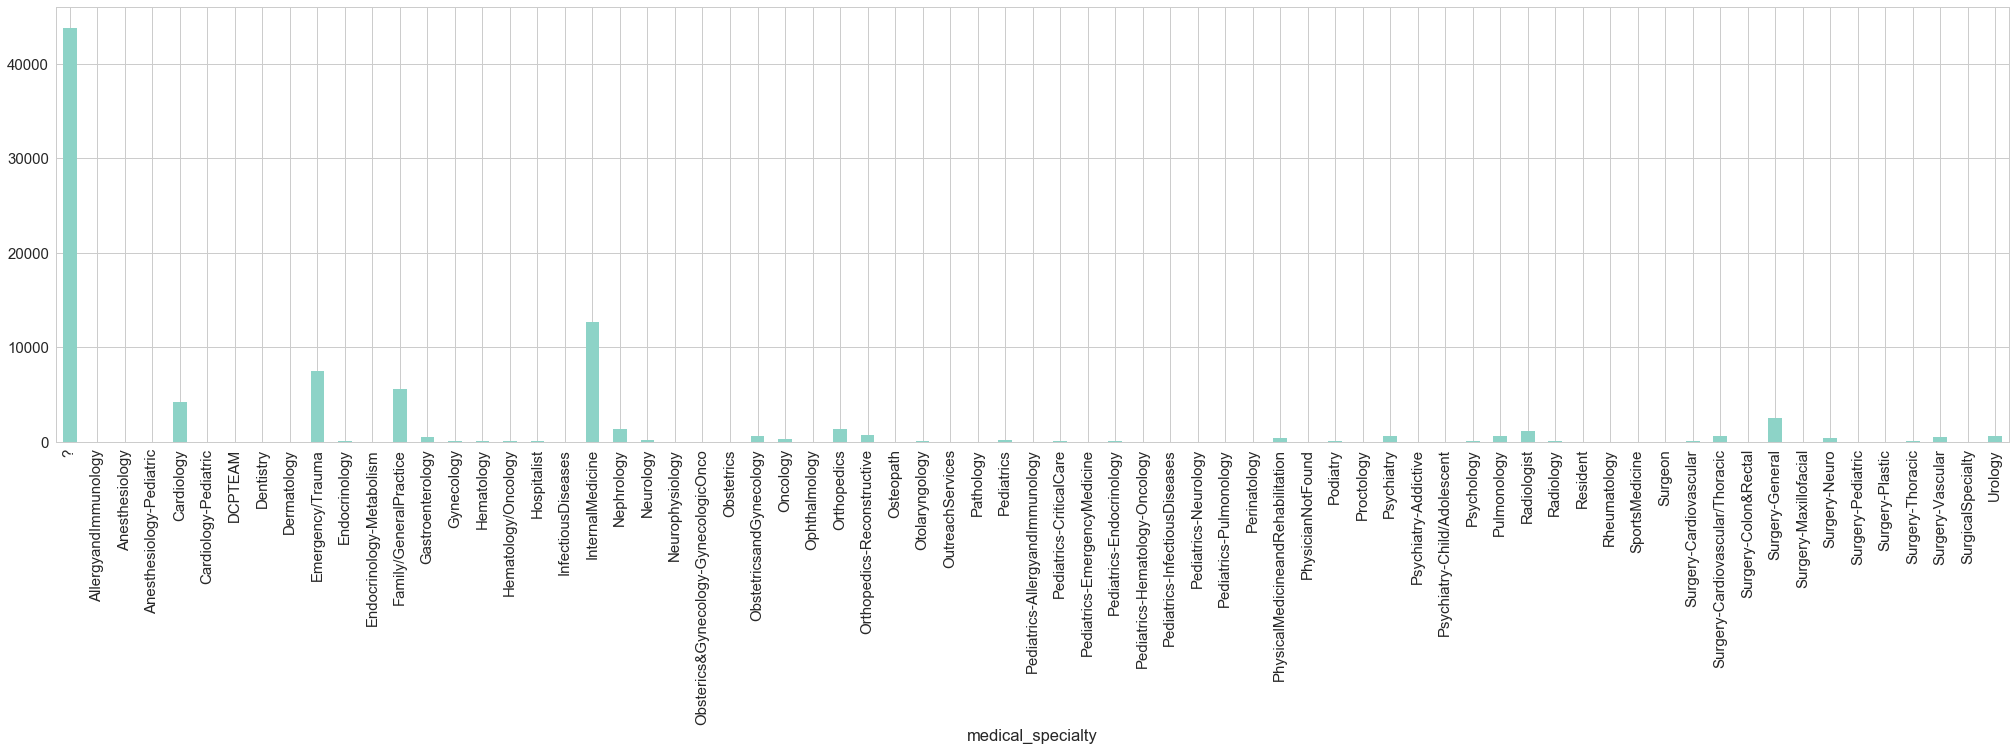

In [40]:
ms_data.plot(kind="bar", figsize=(35, 8))

In [41]:
len(list(initData.columns))

50

In [42]:
initData.drop([
    'patient_nbr','encounter_id','weight','payer_code','diag_1','diag_2','diag_3','metformin','medical_specialty',
    'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone','glipizide-metformin','glyburide-metformin',
    'insulin','citoglipton','examide','tolazamide','troglitazone','miglitol','acarbose','rosiglitazone','pioglitazone',
    'tolbutamide','glyburide','glipizide','acetohexamide','glimepiride','chlorpropamide','nateglinide','repaglinide',
    'metformin','number_diagnoses'
], axis=1, inplace=True)

In [44]:
len(initData)

88316

In [45]:
initData.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Gender & Race Distribution Graphs

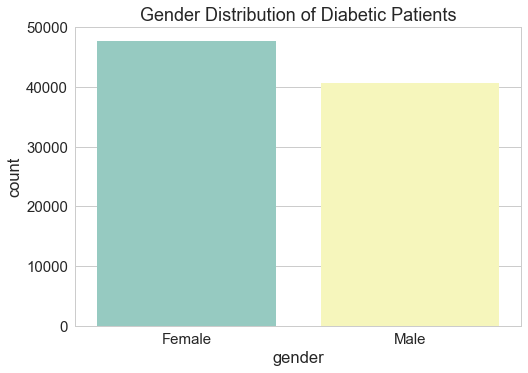

In [46]:
# Overall Gender Distribution
genderDistribution = sns.countplot(x="gender", data=initData).set_title('Gender Distribution of Diabetic Patients')

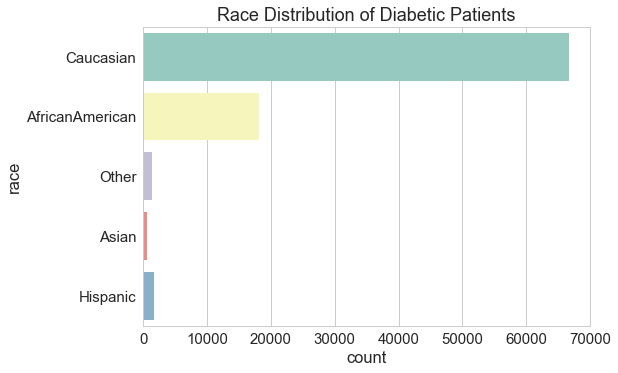

In [47]:
# Overal race distribution
raceDistribution = sns.countplot(y="race", data=initData).set_title('Race Distribution of Diabetic Patients')

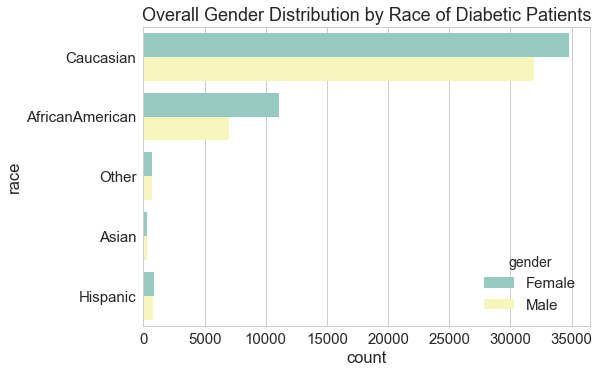

In [48]:
# Overall race distribution graph by gender
raceByGender = sns.countplot(y="race", hue="gender", data=initData).set_title('Overall Gender Distribution by Race of Diabetic Patients')

In [49]:
initData.max_glu_serum.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

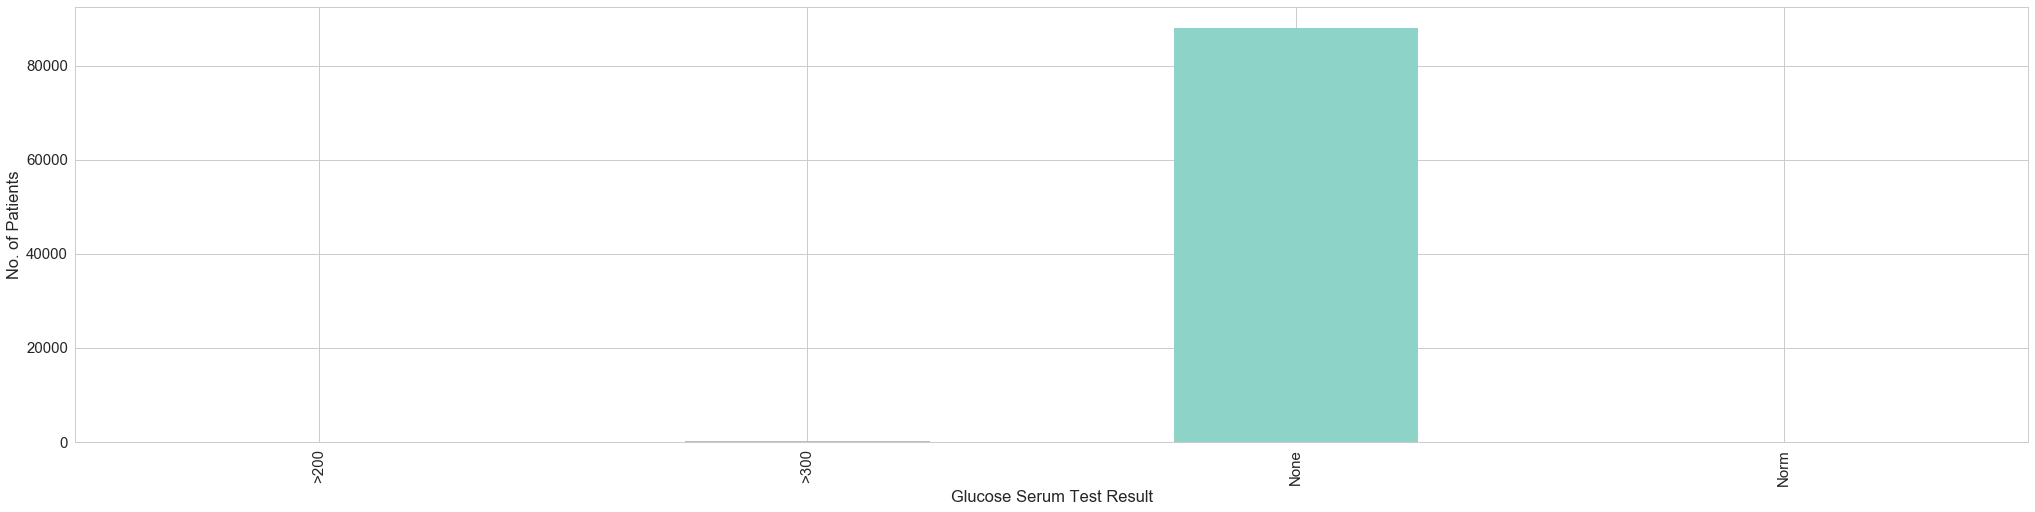

In [50]:
abc = initData.groupby('max_glu_serum')['max_glu_serum'].count()
abcplot = abc.plot(kind="bar", figsize=(35, 8))
abcplot.set_ylabel('No. of Patients')
abcplot.set_xlabel('Glucose Serum Test Result')

In [52]:
initData.drop(['max_glu_serum'], axis=1, inplace=True)

In [54]:
initData.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

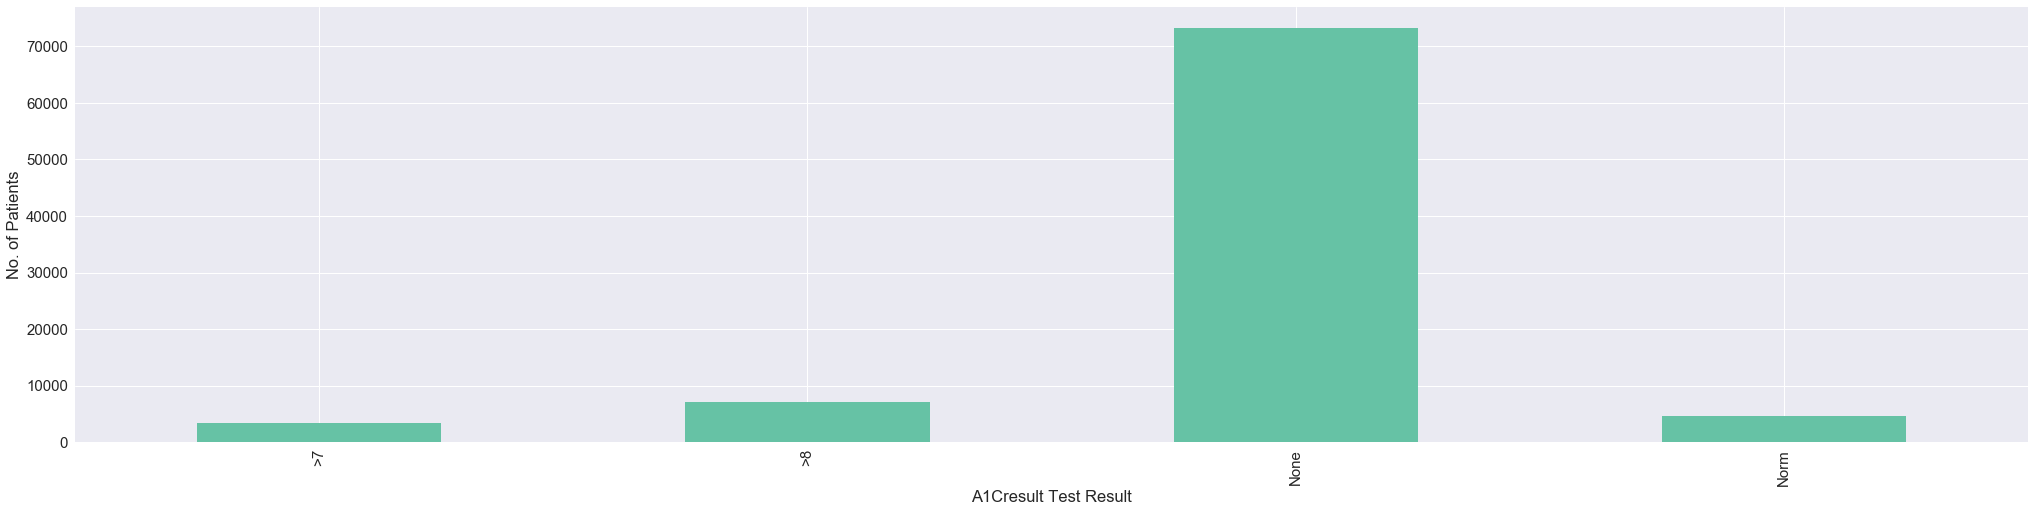

In [131]:
a1c = initData.groupby('A1Cresult')['A1Cresult'].count() # count patients by A1Cresult
a1cplot = abc.plot(kind="bar", figsize=(35, 8)) # Create graph for A1Cresult
a1cplot.set_ylabel('No. of Patients') # set label for y axis
a1cplot.set_xlabel('A1Cresult Test Result') # set label for x axis
a1cplot.figure.savefig('graphs_findings/a1cresult_test.png') # save graph

In [132]:
initData.readmitted.unique()

array([1, 0, 2], dtype=int64)

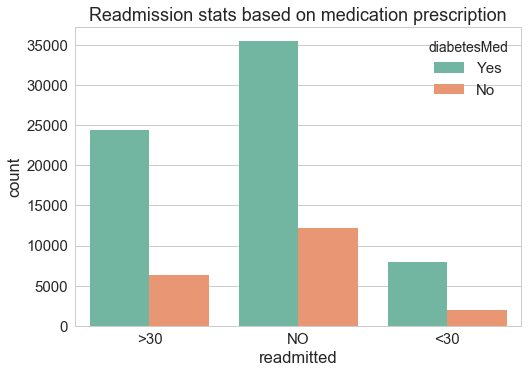

In [58]:
readmitMed = sns.set(style="whitegrid", palette="Set2", font="sans-serif", font_scale=1.5)
readmitMed = sns.countplot(x="readmitted", hue="diabetesMed", data=initData, orient="v").set_title('Readmission stats based on medication prescription')

## Number of medications consumed by patients based on their race and time in hospital

In [62]:
mph = initData.pivot_table(index='race', columns='time_in_hospital', values='num_medications')

In [63]:
mph

time_in_hospital         1          2          3          4          5   \
race                                                                      
AfricanAmerican   10.706655  11.904074  13.524194  14.977385  16.464484   
Asian              8.390909  10.333333  12.344444  13.597015  14.687500   
Caucasian         11.354964  12.758208  14.567975  16.223337  17.816057   
Hispanic           9.072289  10.639053  12.469256  14.615023  16.005882   
Other              9.600000  11.780822  13.074689  15.068571  16.429825   

time_in_hospital         6          7          8          9          10  \
race                                                                      
AfricanAmerican   17.904797  18.875906  19.758202  21.023091  22.349887   
Asian             15.523810  18.296296  16.555556  21.937500  18.000000   
Caucasian         18.858987  20.286265  21.710554  22.350254  23.503583   
Hispanic          17.009524  18.260274  18.389831  19.285714  24.281250   
Other             18.287671  21.125000  22.454545  21.416667  24.710526   

time_in_hospital         11         12         13         14  
race                                                          
AfricanAmerican   23.712435  23.979866  24.127273  25.193396  
Asian             21.142857  28.000000  23.333333  26.800000  
Caucasian         23.498747  23.908802  24.952970  25.911047  
Hispanic          23.875000  22.055556  19.266667  27.625000  
Other             22.954545  24.125000  21.562500  21.818182

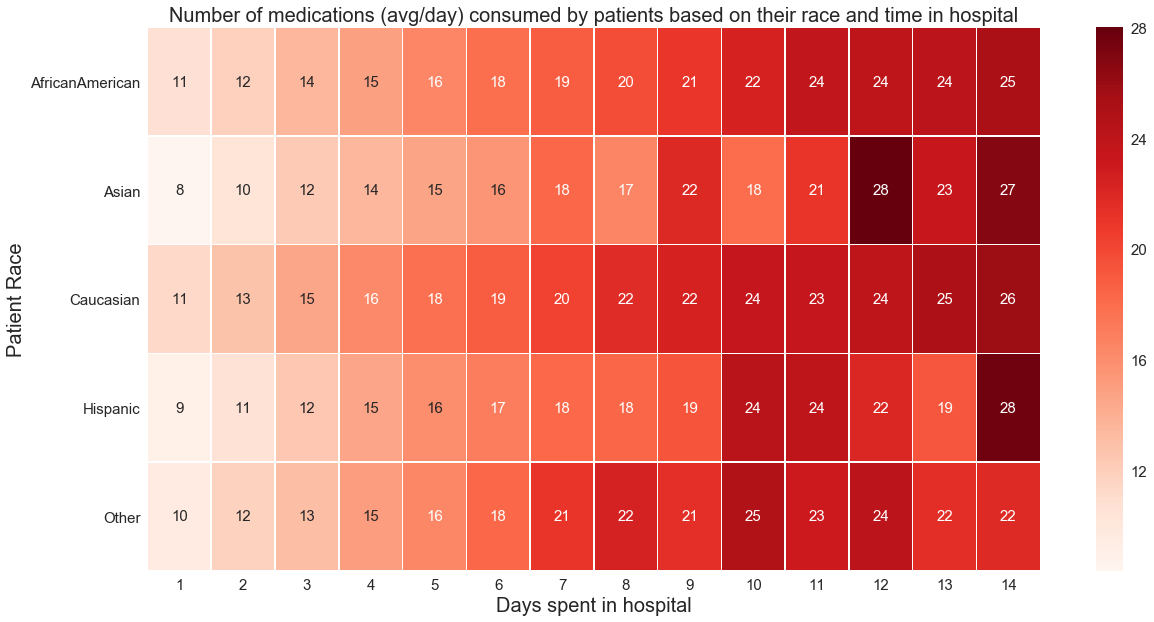

In [64]:
plt.figure(figsize=(20,10))
mph_plot = sns.heatmap(mph, annot=True, annot_kws={"size": 15}, fmt=".0f",
            cmap="Reds", linewidths=.5, cbar_kws={"orientation": "vertical"})
mph_plot.set_title('Number of medications (avg/day) consumed by patients based on their race and time in hospital', size=20)
mph_plot.set_xlabel('Days spent in hospital', size=20)
mph_plot.set_ylabel('Patient Race', size=20)
plt.show()

## Number of lab procedures conducted on patients based on their HBA1c and time in hospital

In [65]:
lph = initData.pivot_table(index='A1Cresult', columns='time_in_hospital', values='num_lab_procedures')

In [66]:
lph

time_in_hospital         1          2          3          4          5   \
A1Cresult                                                                 
0                 31.885355  36.151890  39.003527  42.518526  45.510920   
1                 41.904444  47.650915  51.433912  54.127869  56.203488   
2                 39.741379  46.694013  51.333333  52.025478  55.778075   
3                 44.552561  49.176999  51.794043  53.877089  55.294837   

time_in_hospital         6          7          8          9          10  \
A1Cresult                                                                 
0                 47.100938  48.613295  49.769789  51.445252  51.818069   
1                 55.971795  58.620482  62.259542  62.175439  61.142857   
2                 57.083612  57.889328  60.483871  60.047619  61.091743   
3                 59.027290  59.469933  61.854545  63.169173  61.742105   

time_in_hospital         11         12         13         14  
A1Cresult                                                     
0                 52.850503  52.993157  53.715311  53.009709  
1                 64.569892  65.300000  61.822222  63.468750  
2                 62.279070  64.464286  64.000000  64.070175  
3                 62.791139  65.615385  62.500000  65.939394

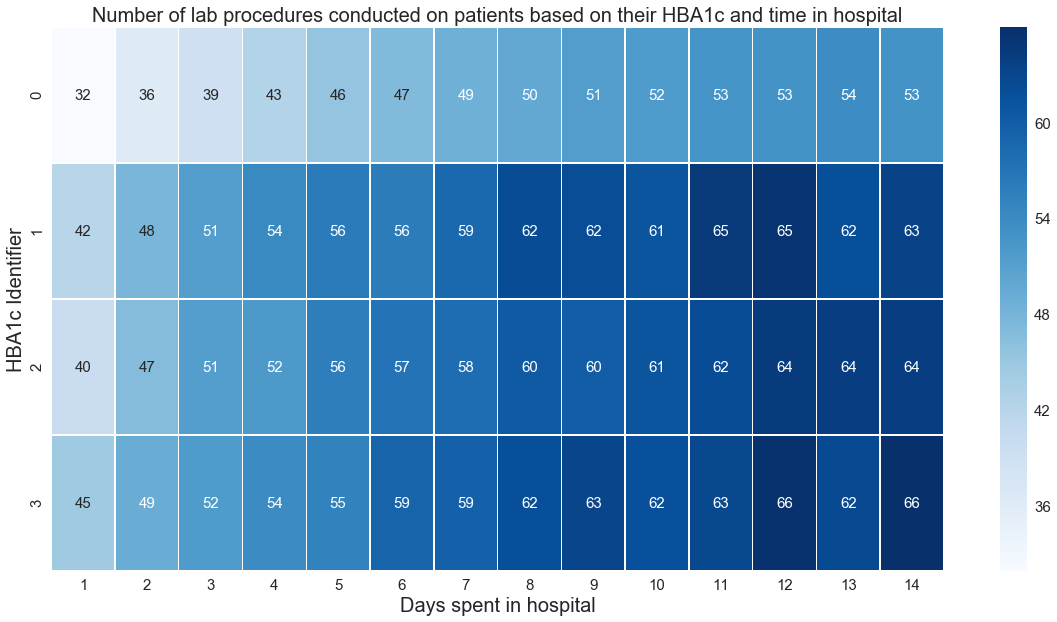

In [68]:
plt.figure(figsize=(20,10))
lph_plot = sns.heatmap(lph, annot=True, annot_kws={"size": 15}, fmt=".0f",
            cmap="Blues", linewidths=.5, cbar_kws={"orientation": "vertical"})
lph_plot.set_title('Number of lab procedures conducted on patients based on their HBA1c and time in hospital', size=20)
lph_plot.set_xlabel('Days spent in hospital', size=20)
lph_plot.set_ylabel('HBA1c Identifier', size=20)
plt.show()

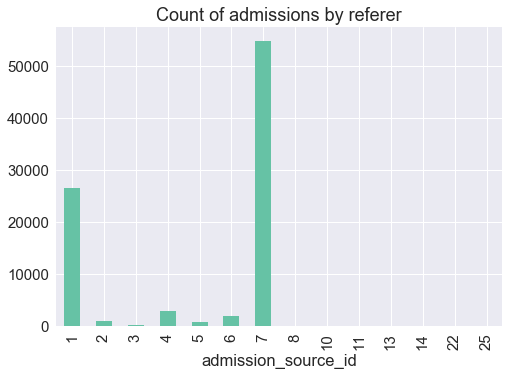

In [133]:
admissionsBySource = initData.admission_source_id.groupby(initData.admission_source_id).count().plot(kind="bar").set_title('Count of admissions by referer') # create graph admissions by referer

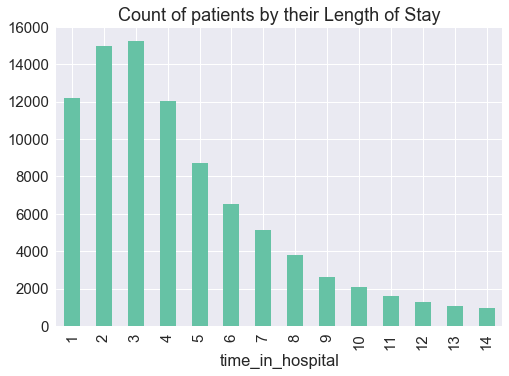

In [72]:
sns.set(style="darkgrid", palette="Set2", font="sans-serif", font_scale=1.5)
lengthOfStay = initData.time_in_hospital.groupby(initData.time_in_hospital).count().plot(
    kind="bar").set_title('Count of patients by their Length of Stay')

# Data Transformation

In [ ]:
initData['A1Cresult'] =  initData.A1Cresult.map({'None': 0, 'Norm': 1, '>7': 2, '>8': 3})

In [ ]:
initData['change'] =  initData.change.map({'Ch': 1, 'No': 0})

In [ ]:
initData['diabetesMed'] =  initData.diabetesMed.map({'Yes': 1, 'No': 0})

In [ ]:
initData['readmitted'] =  initData.readmitted.map({'NO': 0, '>30': 1, '<30': 2})

In [74]:
initData['gender'] = initData.gender.map({"Female":0, "Male":1})

In [75]:
initData.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'], dtype=object)

In [76]:
initData['race'] = initData.race.map({"Caucasian": 0, "AfricanAmerican": 1, "Other": 2, "Hispanic": 3, "Asian": 4})

In [77]:
initData.age.unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [78]:
initData['age'] = initData.age.map({"[10-20)": 0, "[20-30)": 1, "[30-40)": 2, "[40-50)": 3,"[50-60)": 4, "[60-70)": 5, "[70-80)": 6, "[80-90)": 7, "[90-100)": 8})

In [110]:
mlDf_scikit = initData

In [101]:
mlDf_tensorflow = initData

In [114]:
def los_binary_scikit(value):
    if value >= 0 and value <= 7:
        return 0
    elif value >= 8:
        return 1
mlDf_scikit['los'] = mlDf_scikit['time_in_hospital'].apply(los_binary_scikit)

In [115]:
mlDf_scikit.los.unique()

array([0, 1], dtype=int64)

In [116]:
def los_binary_tensorflow(value):
    if value >= 0 and value <= 7:
        return 0
    elif value >= 8 and value <= 10:
        return 1
    elif value >= 11:
        return 2
mlDf_tensorflow['los'] = mlDf_tensorflow['time_in_hospital'].apply(los_binary_tensorflow)

In [118]:
mlDf_tensorflow.los.unique()

array([0, 2, 1], dtype=int64)

In [120]:
mlDf_scikit.to_csv('data/mldata_scikit.csv', index=None)

In [121]:
mlDf_tensorflow.to_csv('data/mldata_tensorflow.csv', index=None)